# Engineering Analytics and Machine Learning Lab 6
## for Specialist Diploma in Internet of Things

### Author’s Name: Teo Kok Keong

### Property of Temasek Polytechnic, Copyright ©.
### For circulation within Temasek Polytechnic only.



# 1 Supervised Learning: Simple Linear Model for Regression

The simplest example of a simple linear regression would be to fitting a line to (x,y) data. We are using commonly use Scikit Learning model in this course.
You may follow the below link to learn more and in detail of the package:

[http://scikit-learn.org/stable/#](http://scikit-learn.org/stable/#)


## 1.1 Simple  Model Linear Regression with Scikit Learning

Let use a randomly generated data to go through the steps to learning USING Scikit learning. In this example, we are using Generalized Linear model available in Scikit. For more information refer to:

[http://scikit-learn.org/stable/supervised_learning.html](http://scikit-learn.org/stable/supervised_learning.html)


Commonmly steps in using the Scikit-Learn estimator API:

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn
2. Choose model hyperparameters by instantiating this class with desired values
3. Arrange data into a feature matrix and target vector 
4. Fit the model to data by call the fic() method of the model instance.
5. Apply the model to new data:
   - For supervised learning, we predict labels for unknown data using the predict() methhod
   - For unsupervised learning, we often transform or infer properties of the data using the transform or predict() methods

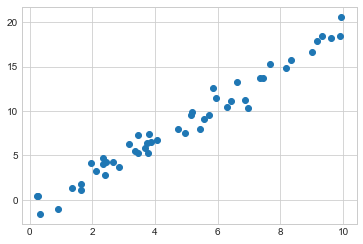

In [150]:
%matplotlib inline
#import library required
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') #set t he stype to use
import numpy as np

rn=np.random.RandomState(30) #set the seed for reproducibility
x=10*rn.rand(50) #produce 10 reandom number
a=2  # the slope of the line
c=5 #y insterseciton of the line

y=a*x+-1+rn.randn(50)
ax=plt.axes()
ax.scatter(x,y)

(50,)
(50, 1)
[2.02341135]
-1.2628188060722358
the root mean squared error is:  9.783506440735554


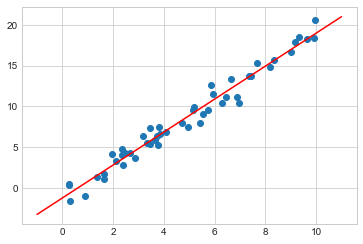

In [151]:
#use a sklearn linear model to fit the data
from sklearn.linear_model import LinearRegression     #step 1
from sklearn.metrics import mean_squared_error
model=LinearRegression(fit_intercept=True)            #step 2
print(x.shape)
X=x[:,np.newaxis]                                     #step 3
print(X.shape)
model.fit(X,y)                                        #step 4 
print(model.coef_)         #print the coeffficents
print(model.intercept_)    #print the incept value             
xfit=np.linspace(-1,11)
xfit=xfit[:,np.newaxis]
yfit=model.predict(xfit)                            #step 5
plt.scatter(x,y)
plt.plot(xfit,yfit,c='r')
err1=mean_squared_error(y,yfit)
print('the root mean squared error is: ',err1**0.5)

## 1.2 Simple data with Housing Dataset

Let's try our hand on some housing data where we try to predict the price based on other attributes included in the csv file. Let's load the housing.csv file and take a look at the first few rows of the data and also check the info to ensure that the data is cleaned. If the data is not cleaned, further processing had to be done to clean before proceeding to prediction.

In [152]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

df=pd.read_csv('housing.csv')   
print(df.head())
print(df.info())
print(df.describe())


   Unnamed: 0    price  lotsize  bedrooms  bathrms  stories driveway recroom  \
0           1  42000.0     5850         3        1        2      yes      no   
1           2  38500.0     4000         2        1        1      yes      no   
2           3  49500.0     3060         3        1        1      yes      no   
3           4  60500.0     6650         3        1        2      yes     yes   
4           5  61000.0     6360         2        1        1      yes      no   

  fullbase gashw airco  garagepl prefarea  
0      yes    no    no         1       no  
1       no    no    no         0       no  
2       no    no    no         0       no  
3       no    no    no         0       no  
4       no    no    no         0       no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 13 columns):
Unnamed: 0    546 non-null int64
price         546 non-null float64
lotsize       546 non-null int64
bedrooms      546 non-null int64
bathrms       54

We start using lotsize to predict the price of the house.

Text(0.5,1,'Train and Test data of Price vs lot size')

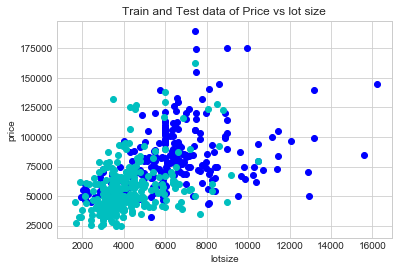

In [153]:
#prepare data which is step 3
Y = df['price']  #price is the target, Y
X = df['lotsize']  #lotsize is the attribute, X
X=X.values.reshape(len(X),1)   #convert to 
Y=Y.values.reshape(len(Y),1)
 
# Split the data into training/testing sets
X_train = X[:-250]    #first 250 is training data
X_test = X[-250:]     #the rest are test data
 
# Split the targets into training/testing sets
Y_train = Y[:-250]
Y_test = Y[-250:]
ax=plt.axes()
ax.scatter(X_test,Y_test,c='b')
ax.scatter(X_train,Y_train,c='c')
ax.set_xlabel('lotsize')
ax.set_ylabel('price')
ax.set_title("Train and Test data of Price vs lot size")

[[6.13186178]]
[30963.20639361]
26943.451233890763


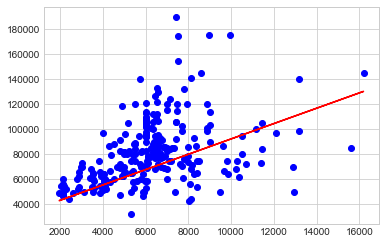

In [154]:
from sklearn.linear_model import LinearRegression     #step 1
modelP=LinearRegression(fit_intercept=True)           #step 2

modelP.fit(X_train,Y_train)                          #step 4


print(modelP.coef_)
print(modelP.intercept_)

yfit=modelP.predict(X_test)                        #step 5
plt.scatter(X_test,Y_test,c='b')
plt.plot(X_test,yfit,c='r')
err1=mean_squared_error(Y_test,yfit)
print(err1**0.5)

After we finish training the model, we would probably want to save the model for future use. We could do this by using hte joblib package as shown below:

In [155]:
# Save Model Using joblib
from sklearn.externals import joblib
# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(yfit, filename)

['finalized_model.sav']

Let's load the load the saved model and compute the root mean squared error with he same test data. The result should match that model we had saved previsou.

In [156]:
loaded_model = joblib.load(filename)
result = mean_squared_error(Y_test,loaded_model)
print(result**0.5)

26943.451233890763


## 1.3 Predication Performance Improvement

Obviously there is lot of room for improvement. Let's try various simple methods to improve the performance. From the graph of the Train and Test data vs lotsize, we can see thaht by simply split the data linearly obviouisly does not work. We need to have a way to split the data randomly, so as to better represent the distribution of the data. Start by using train_test_split function provided by sklearn.

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

modelG=LinearRegression(fit_intercept=True)
x1,x2,y1,y2=train_test_split(X,Y,random_state=0,test_size=0.5)  #to randomly spilt data to train and test

modelG.fit(x1,y1)
y2_model=modelG.predict(x2)
err2=mean_squared_error(y2,y2_model)
print(err2**0.5)


22920.0947864792


In [158]:
print('improvement in accuracy (%) :')
print(((err1**0.5-err2**0.5)/(err1**0.5))*100)
print("we can see a immediate reduction in error")

improvement in accuracy (%) :
14.932594983788835
we can see a immediate reduction in error


In [159]:
#add in more attributes for learning and we prepare our dta here
X=np.array([df['lotsize'], df['bedrooms']]) #using two attributes, lotsize and bedrooms for prediction.
X=X.T
modelB=LinearRegression(fit_intercept=True)
x1,x2,y1,y2=train_test_split(X,Y,random_state=0,test_size=0.5)
modelB.fit(x1,y1)
y2_modelB=modelB.predict(x2)
err3=mean_squared_error(y2,y2_modelB)
print(err3**0.5)


21433.285432609606


As we can see the square error is worst then having only lotsize alone. Let's try to add in one more attribute : driveway. Only there is one issue, driveway contain text either 'yes' or 'no'. Thus we need to convert these text to numerical value. Below is the code to encode "no" or "yes" to 0 and 1 using sklearn preprocessing LabelEncoder.

In [161]:
from sklearn import preprocessing 
# encode class values as integers
le = preprocessing.LabelEncoder() #create an encoder instance
le.fit(["no", "yes"])             #fit the encoder with two string "no" and "yes"
print(list(list(le.classes_)))
df['driveway']=le.transform(df['driveway'])    #to transform df['driveway'] value of yes and no to 1 and 0
print(df.head())


['no', 'yes']
   Unnamed: 0    price  lotsize  bedrooms  bathrms  stories  driveway recroom  \
0           1  42000.0     5850         3        1        2         1      no   
1           2  38500.0     4000         2        1        1         1      no   
2           3  49500.0     3060         3        1        1         1      no   
3           4  60500.0     6650         3        1        2         1     yes   
4           5  61000.0     6360         2        1        1         1      no   

  fullbase gashw airco  garagepl prefarea  
0      yes    no    no         1       no  
1       no    no    no         0       no  
2       no    no    no         0       no  
3       no    no    no         0       no  
4       no    no    no         0       no  


In [162]:
#once driveway is properly encoded to numberic, we can proceed to train a model with them
modelC=LinearRegression(fit_intercept=True)
X=np.array([df['lotsize'], df['bedrooms'],df['driveway'],df['bathrms']])
X=X.T
modelB=LinearRegression(fit_intercept=True)
x1,x2,y1,y2=train_test_split(X,Y,random_state=0,test_size=0.2)
modelC.fit(x1,y1)
y2_modelC=modelC.predict(x2)
err4=mean_squared_error(y2,y2_modelC)
print(err4**0.5)

18537.10372128025


## Exercise 1

Please add more paramters from housing data to futher improve the prediction.

In [122]:
# your code start here

modelC=LinearRegression(fit_intercept=True)
df['fullbase']=le.transform(df['fullbase'])    #to transform df['driveway'] value of yes and no to 1 and 0
#print(df.head())
X=np.array([df['lotsize'], df['bedrooms'],df['driveway'],df['stories'],df['fullbase']])
X=X.T
modelB=LinearRegression(fit_intercept=True)
x1,x2,y1,y2=train_test_split(X,Y,random_state=0,test_size=0.2)
modelC.fit(x1,y1)
y2_modelC=modelC.predict(x2)
err5=mean_squared_error(y2,y2_modelC)
print(err5**0.5)


19892.801398371175


## 1.3 Bayesian Regression Model

Bayesian regression techniques can be used to include regularization parameters in the estimation procedure: the regularization parameter is not set in a hard sense but tuned to the data at hand.

This can be done by introducing uninformative priors over the hyper parameters of the model. The  regularization used in Ridge Regression is equivalent to finding a maximum a posteriori estimation under a Gaussian prior over the parameters with precision . Instead of setting lambda manually, it is possible to treat it as a random variable to be estimated from the data.

To obtain a fully probabilistic model, the output  is assumed to be Gaussian distributed around :

Alpha is again treated as a random variable that is to be estimated from the data.

The advantages of Bayesian Regression are:

It adapts to the data at hand.
It can be used to include regularization parameters in the estimation procedure.
The disadvantages of Bayesian regression include:

Inference of the model can be time consuming.

Reference to the below link for the full documentation:

[http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html#sklearn.linear_model.BayesianRidge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html#sklearn.linear_model.BayesianRidge)

In [163]:
import numpy as np
from sklearn.linear_model import BayesianRidge
from sklearn import preprocessing 

ModelBay=BayesianRidge(n_iter=5000,fit_intercept=True)
X=np.array([df['lotsize'], df['bedrooms'],df['driveway']])
X=X.T
x1,x2,y1,y2=train_test_split(X,Y,random_state=0,test_size=0.2)
#print(y1)
ModelBay.fit(x1,y1.ravel())        # if y.shape == (10, 1), using y.ravel().shape == (10, )
y2_ModelBay=ModelBay.predict(x2)
err9=mean_squared_error(y2,y2_ModelBay)
print(err9**0.5)

22465.576294716502


## Exerise 2

Use ARDRegression Linnear Model to predict the value of housing price. For detail documentation follow the url below:

[http://scikitlearn.org/stable/modules/generated/sklearn.linear_model.ARDRegression.html#sklearn.linear_model.ARDRegression](http://scikitlearn.org/stable/modules/generated/sklearn.linear_model.ARDRegression.html#sklearn.linear_model.ARDRegression)

In [124]:
import numpy as np
from sklearn.linear_model import ARDRegression
ModelS=ARDRegression(n_iter=1000,fit_intercept=True)
X=np.array([df['lotsize'], df['bedrooms'],df['driveway']])
X=X.T
x1,x2,y1,y2=train_test_split(X,Y,random_state=0,test_size=0.2)
#print(y1)
ModelS.fit(x1,y1.ravel())    # if y.shape == (10, 1), using y.ravel().shape == (10, )
y2_ModelS=ModelS.predict(x2)
err10=mean_squared_error(y2,y2_ModelS)
print(err10**0.5)

20847.541675271674


# 2 Simple Linear Regression for Classification





Let start by loading the digit dataset is considered the "Hello World" in clasification. This dataset is avaliable in various sources and formats. The digit database is created by collecting 250 samples from 44 writers. The samples written by 30 writers are used for training, cross-validation and writer dependent testing, and the digits written by the other 14 are used for writer independent testing. This database is also available in the UNIPEN format. We are going to load through sklearn in this case.

More information on the digit dataset from Sickit:

[http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html)

Detail information on the digit dataset from UCI:

[http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits](http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits)



In [164]:
from sklearn import datasets
import matplotlib.pyplot as plt
# The digits dataset
digits = datasets.load_digits()
images_and_labels = list(zip(digits.images, digits.target))

A dataset is a dictionary-like object that holds all the data and some metadata about the data. This data is stored in the .data member, which is a n_samples, n_features array. In the case of supervised problem, one or more response variables are stored in the .target member. More details on the different datasets can be found in the dedicated section.

For instance, in the case of the digits dataset, digits.data gives access to the features that can be used to classify the digits samples:

In [166]:
print(len(images_and_labels))
print(digits.data)
print(digits.target)


1797
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


We can display the first 10 images of the digits forr us to have a better understanding of the dataset.

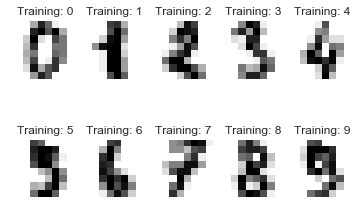

In [167]:
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)


Let's load the next 10 for viewing

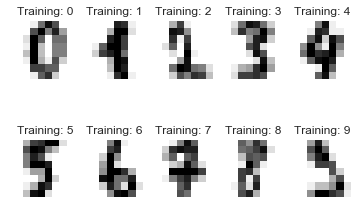

In [128]:
for index, (image, label) in enumerate(images_and_labels[10:20]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

Let's start by preparing the data to the right format for linear regression

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

classifier=SGDClassifier(max_iter=1000)
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
Xtrain, Xtest, ytrain, ytest=train_test_split(data,digits.target,random_state=0,test_size=0.2)
classifier.fit(Xtrain,ytrain)
ypredict=classifier.predict(Xtest)
print(accuracy_score(ytest,ypredict))  #percentage of classification on the test data is correct

0.9166666666666666


It is really great to be able to achieve accuracy above 90% accuracy. However, this doesn't tell me what had gone wrong which would help us to improve the accuracy further. We will use seaborn to plot the confusion matrix which show us the frequency of miscalculation by our classifier.

Text(96.18,0.5,'true value')

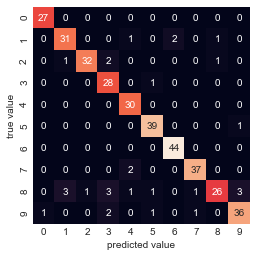

In [169]:
from sklearn.metrics import confusion_matrix
import  seaborn as sns
mat=confusion_matrix(ytest,ypredict)
sns.heatmap(mat,square=True,annot=True,cbar=False,fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')

## Exercise 3

Use GaussianNB linear model to perform classification on the digit dataset. Also plot the confusion matrix. 

For detail documentation follow the below url:

[http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)


In [131]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import  GaussianNB
from sklearn.metrics import accuracy_score

classifier= GaussianNB()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
Xtrain, Xtest, ytrain, ytest=train_test_split(data,digits.target,random_state=0,test_size=0.2)
classifier.fit(Xtrain,ytrain)
ypredict=classifier.predict(Xtest)
print(accuracy_score(ytest,ypredict))

0.825


Text(96.18,0.5,'true value')

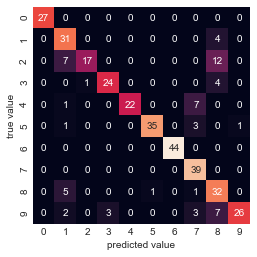

In [132]:
from sklearn.metrics import confusion_matrix
import  seaborn as sns
mat2=confusion_matrix(ytest,ypredict)
sns.heatmap(mat2,square=True,annot=True,cbar=False,fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')

## Exercise 4 

Use Linear Support Vector Classification (SVC) which belong to the SVM family to perform classification on the digit dataset. Also plot the confusion matrix.
For detail documentation follow the below url:

[http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))


n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
Xtrain, Xtest, ytrain, ytest=train_test_split(data,digits.target,random_state=0,test_size=0.2,shuffle=True)
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(Xtrain, ytrain)
y_pred=clf.predict(Xtest)

print(accuracy_score(ytest,y_pred))

0.9444444444444444


Text(96.18,0.5,'true value')

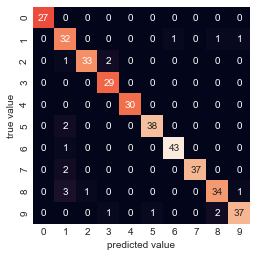

In [134]:
from sklearn.metrics import confusion_matrix
import  seaborn as sns

mat2=confusion_matrix(ytest,y_pred)
sns.heatmap(mat2,square=True,annot=True,cbar=False,fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')

## Exercise 5 


Use Decision Tree to perform classification on the digit dataset. Also plot the confusion matrix. For detail documentation follow the below url:

[http://scikit-learn.org/stable/modules/tree.html#classification](http://scikit-learn.org/stable/modules/tree.html#classification)

In [135]:
from sklearn import tree
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
Xtrain, Xtest, ytrain, ytest=train_test_split(data,digits.target,random_state=0,test_size=0.2)
clf =tree.DecisionTreeClassifier()
clf.fit(Xtrain, ytrain)
y_pred=clf.predict(Xtest)

print(accuracy_score(ytest,y_pred))



0.8555555555555555


## Exercise 6

Load Abalone.csb for classication task. Some information about the data:

- Predicting the age of abalone from physical measurements. 
- The age of-abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope 
- a boring andtime-consuming task.  
- Other measurements, which are easier to obtain, areused to predict the age.  

Attributes:
  - 1   sex                 u  M F I	# Gender or Infant (I)
  - 2   length              u  (0,Inf]	# Longest shell measurement (mm)
  - 3   diameter            u  (0,Inf]	# perpendicular to length     (mm)
  - 4   height              u  (0,Inf]	# with meat in shell (mm)
  - 5   whole_weight        u  (0,Inf]	# whole abalone  (gr)
  - 6   shucked_weight      u  (0,Inf]	# weight of meat (gr)    
  - 7   viscera_weight      u  (0,Inf]	# gut weight (after bleeding) (gr)
  - 8   shell_weight        u  (0,Inf]	# after being dried (gr)
  - 9   rings               u  0..29	# +1.5 gives the age in years

In [136]:
import numpy as np
import pandas as pd
ddf=pd.read_csv('abalone/abalone_data.csv')
print(ddf.head())
from sklearn import preprocessing 
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# encode class values as integers
le = preprocessing.LabelEncoder() #create an encoder instance
le.fit(["M", "F","I"])             #fit the encoder with three string "M", "F" and "I"
print(list(list(le.classes_)))

ddf['Sex']=le.transform(ddf['Sex'])    #to transform df['driveway'] value of yes and no to 1 and 0

target=ddf['Rings']
ddf.drop('Rings',axis=1, inplace=True)
print(ddf.head())
n_samples = len(ddf)
print(ddf.shape)
ddf = ddf.values.reshape((n_samples, -1))
print(ddf.shape)
classifier=SGDClassifier()
Xtrain, Xtest, ytrain, ytest=train_test_split(ddf,target,random_state=0,test_size=0.2,shuffle=True)
clf = SGDClassifier(random_state=0, tol=1e-5)
classifier.fit(Xtrain,ytrain)
ypredict=classifier.predict(Xtest)
print(accuracy_score(ytest,ypredict))



  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weigh  Rings  
0        0.150     15  
1        0.070      7  
2        0.210      9  
3        0.155     10  
4        0.055      7  
['F', 'I', 'M']
   Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0    2   0.455     0.365   0.095        0.5140          0.2245   
1    2   0.350     0.265   0.090        0.2255          0.0995   
2    0   0.530     0.420   0.135        0.6770          0.2565   
3    2   0.440     0.365   0.125        0.5160          0.2155   
4    1   0.330     0.25

c:\users\teokk\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Text(73.5,0.5,'true value')

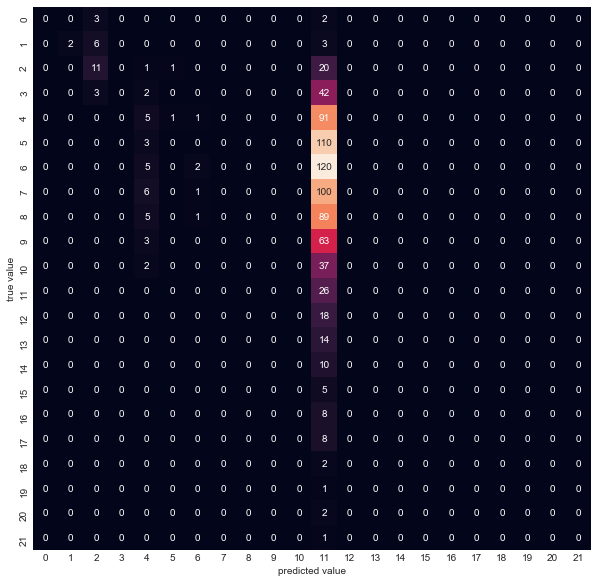

In [137]:
from sklearn.metrics import confusion_matrix
import  seaborn as sns
plt.figure(figsize = (10,10))
mat2=confusion_matrix(ytest,ypredict)
sns.heatmap(mat2,square=False,annot=True,cbar=False,fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 29]
[  1   1  15  57 115 259 391 568 689 634 487 267 203 126 103  67  58  42
  32  26  14   6   9   2   1   1   2   1]


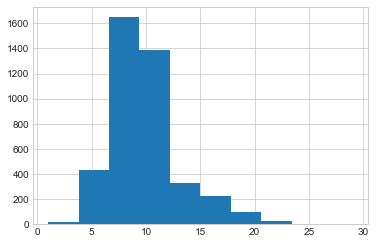

In [138]:
ax=plt.axes()
ax.hist(target)
unique, counts = np.unique(target, return_counts=True)
print(unique)
print(counts)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27]
[  1   1  10  46  82 212 293 455 562 527 392 201 164 100  85  53  48  37
  24  18  12   5   7   2   1   1   2]


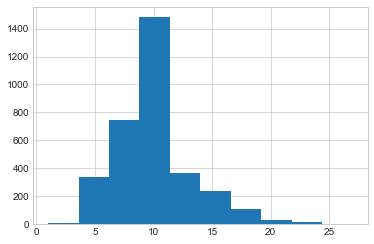

In [139]:
ax=plt.axes()
ax.hist(ytrain)
unique, counts = np.unique(ytrain, return_counts=True)
print(unique)
print(counts)

[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 29]
[  5  11  33  47  98 113 127 107  95  66  39  26  18  14  10   5   8   8
   2   1   2   1]


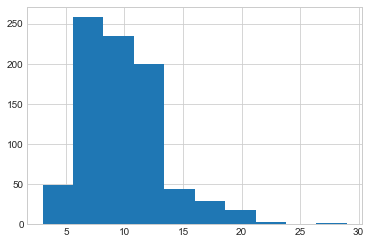

In [140]:
ax=plt.axes()
ax.hist(ytest)
unique, counts = np.unique(ytest, return_counts=True)
print(unique)
print(counts)

In [141]:
import numpy as np
import pandas as pd
from sklearn import preprocessing 
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

dda=pd.read_csv('abalone/abalone_data.csv')
#print(dda.head())
# encode class values as integers
le = preprocessing.LabelEncoder() #create an encoder instance
le.fit(["M", "F","I"])             #fit the encoder with three string "M", "F" and "I"

dda['Sex']=le.transform(dda['Sex'])    #to transform df['driveway'] value of yes and no to 1 and 0
print(dda.shape)
dupitem=[1,2,25,26,29]
for c in dupitem:
    print(c)
    iidx=dda.index[dda['Rings']==c].tolist()
    frame=[dda.iloc[iidx[0]]]
    dda=dda.append(frame)
    
target=dda['Rings']
dda.drop('Rings',axis=1, inplace=True)
print(dda.head())
n_samples = len(dda)
print(dda.shape)
dda = dda.values.reshape((n_samples, -1))
print(dda.shape)
Xtrain, Xtest, ytrain, ytest=train_test_split(dda,target,random_state=0,test_size=0.3,shuffle=True,stratify=target)
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(Xtrain,ytrain)
ypredict=clf.predict(Xtest)
print(accuracy_score(ytest,ypredict))
    
    

(4177, 9)
1
2
25
26
29
   Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0  2.0   0.455     0.365   0.095        0.5140          0.2245   
1  2.0   0.350     0.265   0.090        0.2255          0.0995   
2  0.0   0.530     0.420   0.135        0.6770          0.2565   
3  2.0   0.440     0.365   0.125        0.5160          0.2155   
4  1.0   0.330     0.255   0.080        0.2050          0.0895   

   Viscera_weight  Shell_weigh  
0          0.1010        0.150  
1          0.0485        0.070  
2          0.1415        0.210  
3          0.1140        0.155  
4          0.0395        0.055  
(4182, 8)
(4182, 8)
0.26055776892430277


Text(73.5,0.5,'true value')

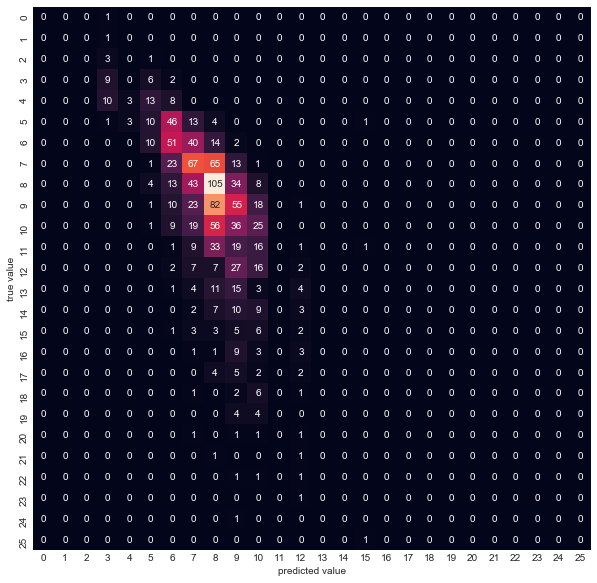

In [142]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import  seaborn as sns
plt.figure(figsize = (10,10))
mat2=confusion_matrix(ytest,ypredict)
sns.heatmap(mat2,square=False,annot=True,cbar=False,fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')